# Вводная часть
## Проект: «Стримчик»


В интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<b>Цель иследования:</b>
* 1.Проанализировать общие данные.
* 2.Провести исследовательский анализ данных.
* 3.Составить портрет пользователя каждого региона.
* 4.Проверьте гипотезы.
* 5.Сделать выводы.

<b>Ход иследования:</b>

Данные получаем из файла с данными с помощью библиотеки pandas и сохраню их в датафрейм:

База данных — games.csv

Проверить данные на ошибки, поиск и удаление всех различных ошибок, которые не должны повлиять на конечный результат, а так же детальная визуализация иследований. 


# Подготовка данных

## Импортируем библиотеки

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

## Прочитаем файл games.csv для анализа

In [93]:
games_df = pd.read_csv('../MyProject/games.csv')

In [94]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего в таблице 16715 строк и 11 колонок.

In [95]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Подготовка данных

### Проверка на явные дубликаты:

In [96]:
duplicate_count = games_df.duplicated().sum()
print(f'Количество явных дубликатов: {duplicate_count}')

Количество явных дубликатов: 0


Явных дубликатов нет

### Проверка и обработка неявных дубликатов:

In [97]:
games_df['Name'] = games_df['Name'].fillna('Unknown')
games_df['Platform'] = games_df['Platform'].fillna('Unknown')
games_df['Year_of_Release'] = games_df['Year_of_Release'].fillna(0)

Проверяем название колонок перед удалением неявных дубликатов

In [98]:
subset_columns = ['Name', 'Platform', 'Year_of_Release']
for col in subset_columns:
    if col not in games_df.columns:
        print(f'Колонка {col} отсутствует в DataFrame')

Если колонки присутствуют, проверим и удалим неявные дубликаты

In [99]:
temp = games_df.copy()

In [100]:
if all(col in games_df.columns for col in subset_columns):
    implicit_duplicates = games_df[games_df.duplicated(subset=subset_columns, keep=False)]
    print(f'Количество неявных дубликатов: {len(implicit_duplicates)}')
    print(implicit_duplicates.head())

    games_df = games_df.drop_duplicates(subset=subset_columns)

    implicit_duplicates_after = games_df[games_df.duplicated(subset=subset_columns, keep=False)]
    print(f'Количество неявных дубликатов после удаления: {len(implicit_duplicates_after)}')

Количество неявных дубликатов: 4
                Name Platform  Year_of_Release   Genre  NA_sales  EU_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
659          Unknown      GEN           1993.0     NaN      1.78      0.53   
14244        Unknown      GEN           1993.0     NaN      0.00      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       JP_sales  Other_sales  Critic_Score User_Score Rating  
604        0.00         0.23          83.0        5.5      E  
659        0.00         0.08           NaN        NaN    NaN  
14244      0.03         0.00           NaN        NaN    NaN  
16230      0.00         0.00          83.0        5.5      E  
Количество неявных дубликатов после удаления: 0


In [102]:
temp[temp[['Name', 'Platform','Year_of_Release']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,Unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


# Меняем названия столбцов (приведим к нижнему регистру);

### Приведем к нижнему регистру

In [103]:
games_df.columns = games_df.columns.str.lower()

### Преобразуем <b>year_of_release</b> в <b>int</b> для упрощения анализа временных данных.

In [104]:
games_df['year_of_release'] = games_df['year_of_release'].astype(int)

In [105]:
temp = games_df.copy()
display(pd.DataFrame(round((temp.isna().mean()*100),2), columns=['NaNs, %'])
        .style.format( '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
name,0.00
platform,0.00
year_of_release,0.00
genre,0.01
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.32
user_score,40.09


In [106]:
missing_years_percentage = games_df['year_of_release'].isnull().mean() * 100
print(f'Процент пропусков в year_of_release: {missing_years_percentage:.2f}%')

Процент пропусков в year_of_release: 0.00%


### Преобразование <b>user_score</b> и <b>critic_score</b> в <b>float</b> требуется для выполнения числовых операций. 'tbd' заменен на None.

In [107]:
temp = games_df.copy()
temp[118:120]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
118,Uncharted 3: Drake's Deception,PS3,2011,Action,2.77,2.75,0.19,1.03,92.0,8.3,T
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E


In [109]:
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan).astype(float)
games_df['critic_score'] = games_df['critic_score'].astype(float)

In [110]:
games_df[118:120]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
118,Uncharted 3: Drake's Deception,PS3,2011,Action,2.77,2.75,0.19,1.03,92.0,8.3,T
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,NaN,E


Обработаем пропуска

In [112]:
missing_data = games_df.isnull().sum()

In [113]:
games_df['rating'] = games_df['rating'].fillna('Unknown')

Можем еще сделать подсчет пропусков в столбце 'rating' после заполнения

In [114]:
missing_data_after_fill = games_df['rating'].isnull().sum()

In [115]:
print("\nПропуски после заполнения в столбце 'rating':")
print(missing_data_after_fill)


Пропуски после заполнения в столбце 'rating':
0


### Подсчет суммарных продаж и с добавлением нового столбца

In [116]:
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Cкорректированный DF

In [117]:
display(games_df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


In [118]:
temp = games_df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en col

In [119]:
temp = temp.dropna(subset=['name', 'genre'])

In [120]:
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']

In [121]:
for col_l in list_c:
    print('-' * 25)
    print(col_l, temp[col_l].sort_values().unique())
    print(col_l, ' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
          ', процент 0', round(temp[temp[col_l] == 0][col_l].count() / len(temp) * 100, 2), '%')
    print(col_l, ': кол-во NaN', temp[col_l].isna().sum(),
          ', процент NaN', round(temp[col_l].isna().mean() * 100, 2), '%')

-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!']
name  : кол-во 0 0 , процент 0 0.0 %
name : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
platform ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
platform  : кол-во 0 0 , процент 0 0.0 %
platform : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
year_of_release [   0 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
year_of_release  : кол-во 0 269 , процент 0 1.61 %
year_of_release : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
genre ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'P

### Промежуточный вывод:

I. Импорт библиотек и загрузка данных:

* Импортированы необходимые библиотеки для анализа данных (pandas, matplotlib.pyplot, scipy.stats, numpy).
* Загружен и проведен первичный анализ данных, содержащих информацию о 16715 играх и 11 колонках.

II. Проверка и обработка дубликатов:

* Явных дубликатов не обнаружено.
* Выполнена проверка на неявные дубликаты по колонкам name, platform, year_of_release.
* Обнаружено и удалено 4 неявных дубликата.

III. Обработка пропусков:

* Заполнены пропуски в колонке name значением 'Unknown', в колонке platform значением 'Unknown', и в колонке year_of_release значением 0.
* Пропуски в колонке rating заполнены значением 'Unknown'.
* Пропуски в колонках user_score и critic_score заменены на NaN для последующего анализа.
* Удалены строки с пропусками в колонках name и genre.

IV. Преобразование данных:

* Приведены к нижнему регистру названия колонок.
* Колонка year_of_release преобразована в тип int.
* Колонки user_score и critic_score преобразованы в тип float с заменой значений 'tbd' на NaN.
* Добавлена колонка total_sales с подсчетом суммарных продаж по регионам.

V. Проверка пропусков после обработки:

* Проведена проверка и обработка пропусков после заполнения.
* Пропуски в колонке rating отсутствуют.

## Проведение исследовательского анализа данных

### Избавимся от лишних годов

In [122]:
games_df['year_of_release'] = games_df['year_of_release'].replace(0, pd.NA)
games_df.dropna(subset=['year_of_release'], inplace=True)
games_df['year_of_release'] = games_df['year_of_release'].astype(int)
games_per_year = games_df['year_of_release'].value_counts().sort_index()

### Определим сколько игр выпускалось в разные годы и построим график

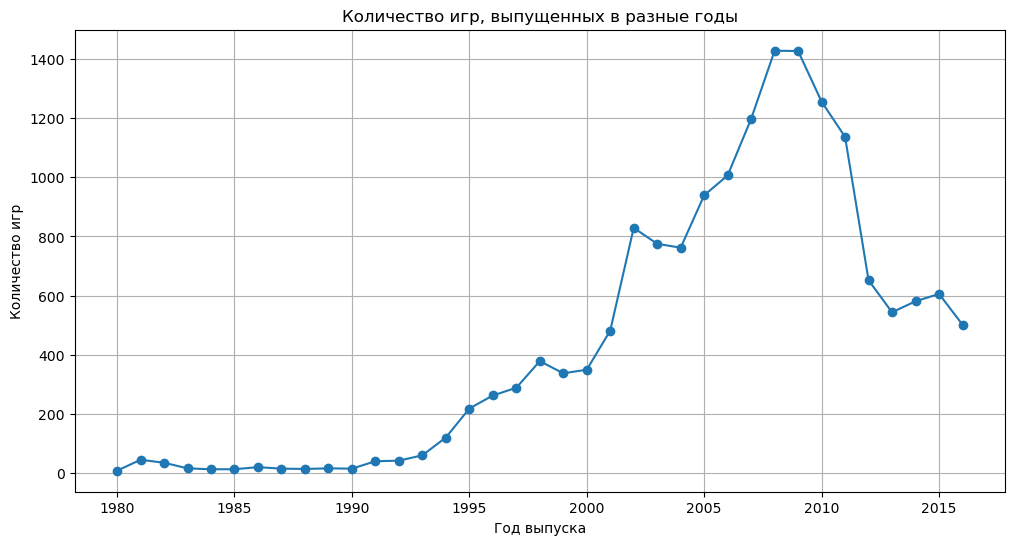

In [123]:
plt.figure(figsize=(12, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o')
plt.title('Количество игр, выпущенных в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()

Строчный вариант:

In [35]:
games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      61
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: int64

### Произведем сбор данных как менялись продажи по платформам

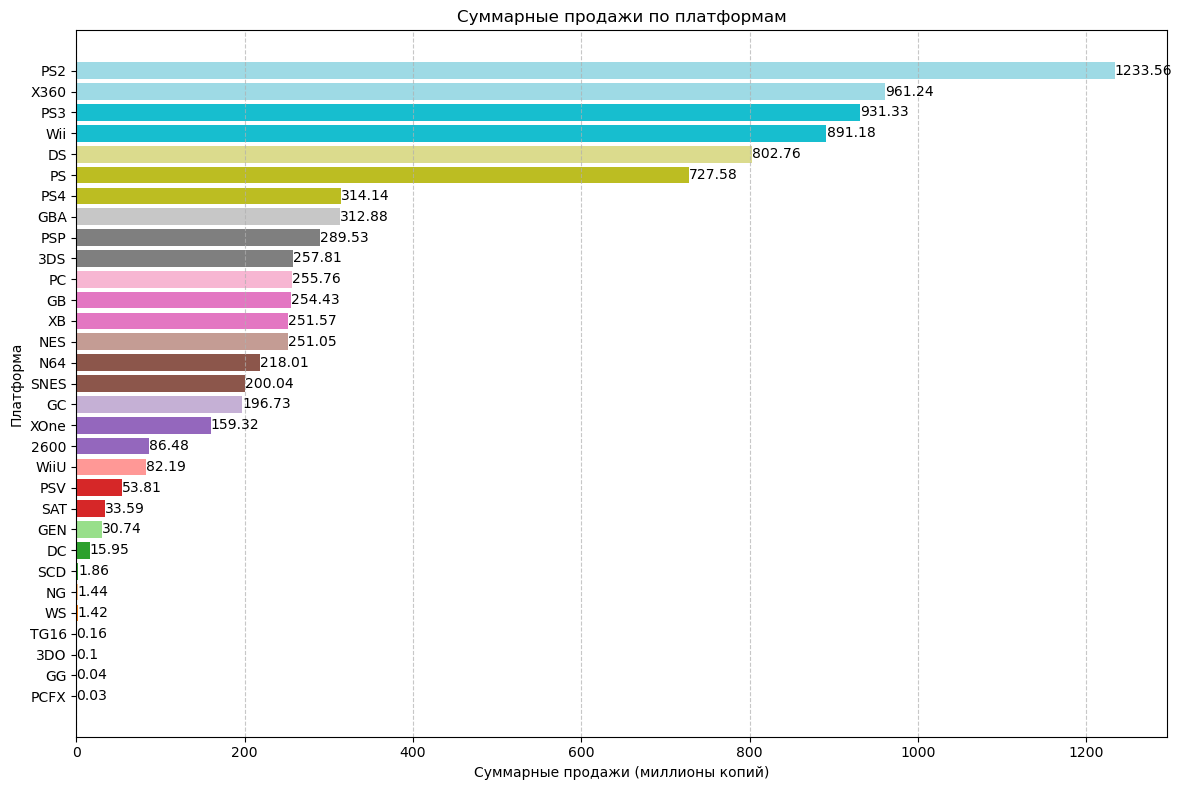

In [221]:
# Подсчет суммарных продаж по платформам и сортировка по возрастанию
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 8))

# Определение цветовой карты
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(platform_sales)))

bars = plt.barh(platform_sales.index, platform_sales.values, color=colors)

# Добавление подписей с точными значениями
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, round(bar.get_width(), 2),
             ha='left', va='center', fontsize=10)

plt.title('Суммарные продажи по платформам')
plt.xlabel('Суммарные продажи (миллионы копий)')
plt.ylabel('Платформа')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Строчный вариант:

In [37]:
platform_sales

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.74
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

### Выбераем платформы с наибольшими суммарными продажами и распределение по годам 

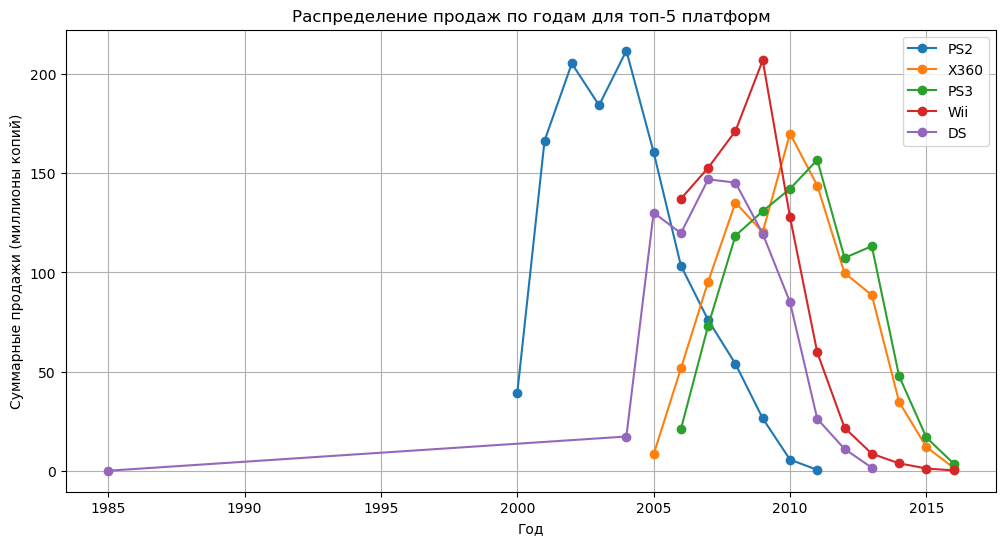

In [124]:
top_platforms = platform_sales.head(5).index

plt.figure(figsize=(12, 6))
for platform in top_platforms:
    sales_per_year = games_df[games_df['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_per_year.index, sales_per_year.values, marker='o', label=platform)
plt.title('Распределение продаж по годам для топ-5 платформ')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (миллионы копий)')
plt.legend()
plt.grid(True)
plt.show()

#### Проверяем платформу DS

In [125]:
ds_data = games_df[games_df['platform'] == 'DS']
print(ds_data[ds_data['year_of_release'] < 2004])  # Не сильно знаком с консолями. Платформа DS появилась только в 2004 года, дейтсвительно. https://niwanetwork.org/wiki/Nintendo_DS

                                      name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0           NaN         NaN   

        rating  total_sales  
15957  Unknown         0.02  


#### Исключаем некорректные значения

In [126]:
games_df = games_df.query("~(platform == 'DS' and year_of_release < 2004)")

Скорретированный график

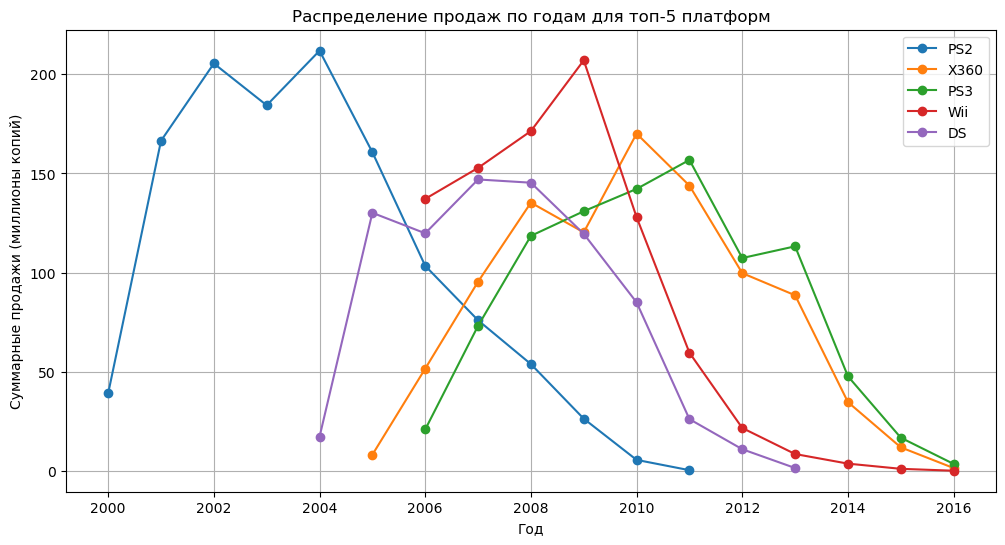

In [41]:
top_platforms = platform_sales.head(5).index

plt.figure(figsize=(12, 6))
for platform in top_platforms:
    sales_per_year = games_df[games_df['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_per_year.index, sales_per_year.values, marker='o', label=platform)
plt.title('Распределение продаж по годам для топ-5 платформ')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (миллионы копий)')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
top_platforms 

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

#### Характерный срок:

* PlayStation 2 (PS2): Выпущена в 2000 году, популярна до конца 2000-х годов, поддержка завершена в начале 2010 года.
* Xbox 360: Выпущена в 2005 году, пик популярности пришелся на 2010 год, поддержка завершена в середине 2010 года.
* PlayStation 3 (PS3): Выпущена в 2006 году, популярна до середины 2010 года, поддержка завершена в конце 2010 года.
* Wii: Выпущена в 2006 году, популярна до начала 2010 года, поддержка завершена в середине 2010 года.
* Nintendo DS (DS): Выпущена в 2004 году, популярна до начала 2010 года, поддержка завершена в середине 2010 года.

### Актульный период консолей (тренды по годам для всех платформ)

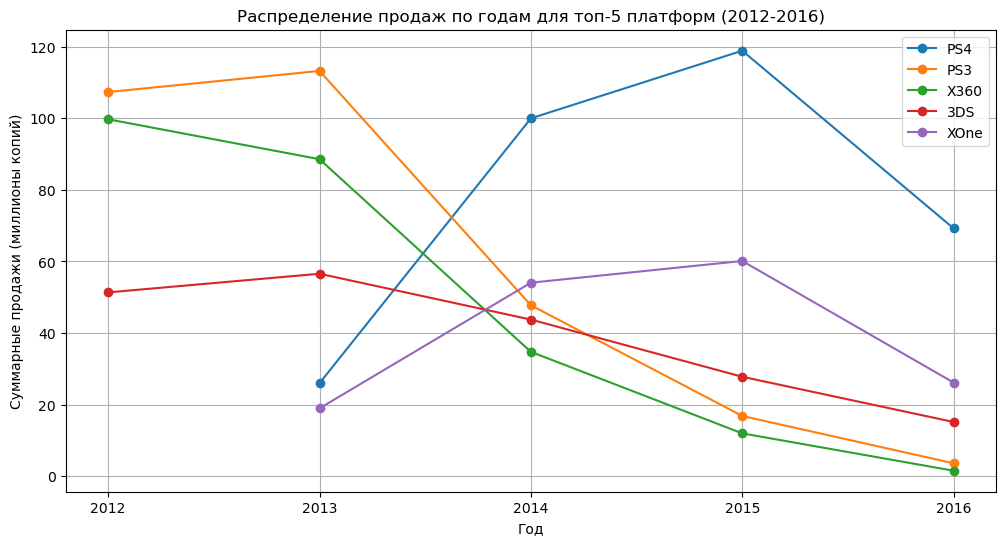

In [130]:
start_year = 2012
end_year = 2016
filtered_games_df = games_df[(games_df['year_of_release'] >= start_year) & (games_df['year_of_release'] <= end_year)]

platform_sales = filtered_games_df.groupby('platform')['total_sales'].sum()

top_platforms = platform_sales.nlargest(5).index.tolist()

plt.figure(figsize=(12, 6))
for platform in top_platforms:
    sales_per_year = filtered_games_df[filtered_games_df['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_per_year.index, sales_per_year.values, marker='o', label=platform)

plt.xticks(ticks=range(start_year, end_year + 1))
plt.title('Распределение продаж по годам для топ-5 платформ (2012-2016)')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (миллионы копий)')
plt.legend()
plt.grid(True)
plt.show()

Лидеры по продажам

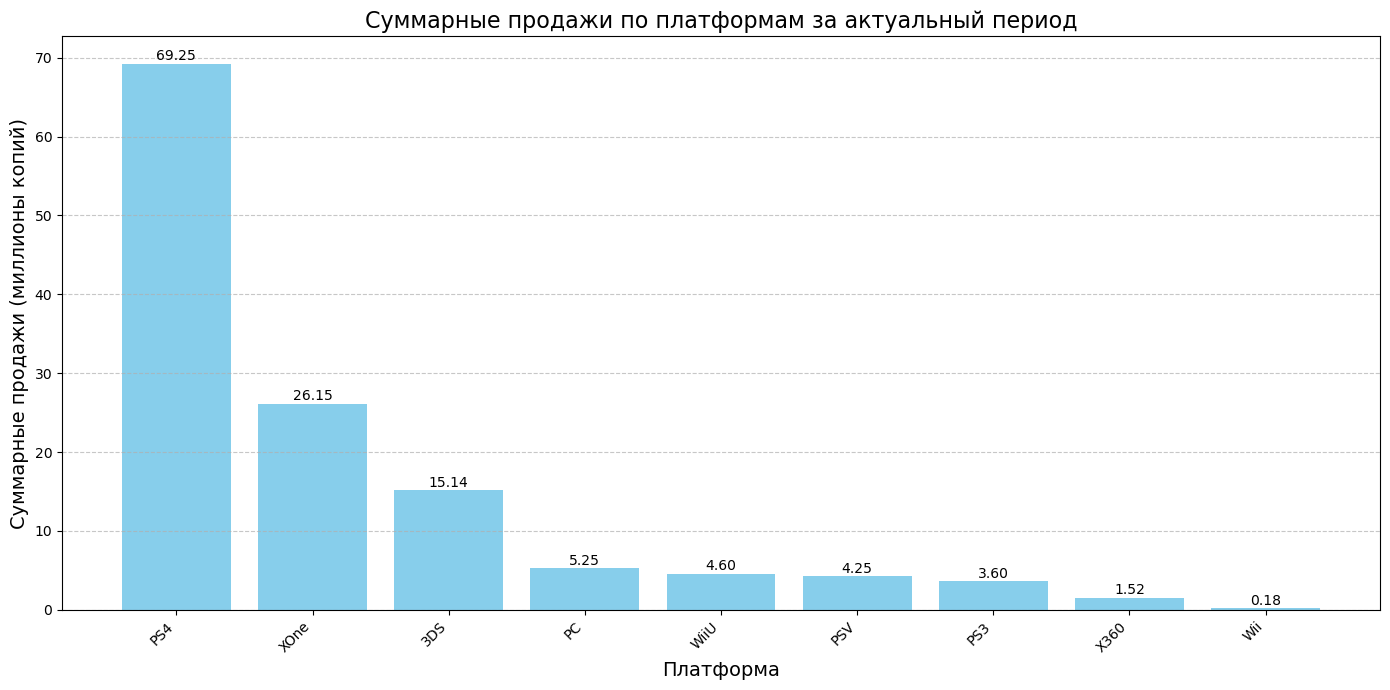

In [199]:
platform_sales_current = current_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
bars = plt.bar(platform_sales_current.index, platform_sales_current.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Суммарные продажи по платформам за актуальный период', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Суммарные продажи (миллионы копий)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


Строчный вариант:

In [132]:
platform_sales_current

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

<b>На основе представленного графика и данных можно сделать следующие выводы:</b>

* Лидеры по продажам: Платформы PS3 и X360 являются лидерами с существенным отрывом в продажах от остальных платформ, превышая 900 миллионов копий каждая.

* Разнообразие платформ: В топ-5 платформ также входят Wii, DS и PS4, что демонстрирует разнообразие и предпочтения потребителей в разные периоды времени.

* Популярность консольных платформ: Видно, что консольные платформы (PS3, X360, Wii, DS, PS4) занимают ведущие позиции, что свидетельствует о их значимости на рынке.

### График "ящик с усами" по глобальным продажам игр в разбивке по платформам

In [155]:
current_year = 2016

relevant_period = current_year - 4
current_period_data = games_df[games_df['year_of_release'] >= relevant_period]

print(current_period_data['year_of_release'].unique())

[2013 2015 2012 2014 2016]


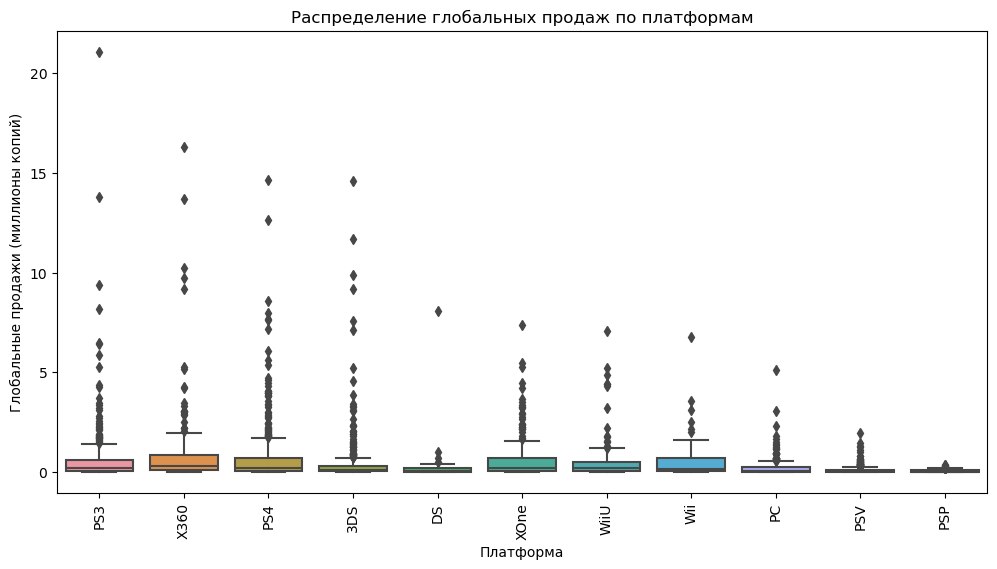

In [157]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=current_period_data)
plt.title('Распределение глобальных продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (миллионы копий)')
plt.xticks(rotation=90)
plt.show()

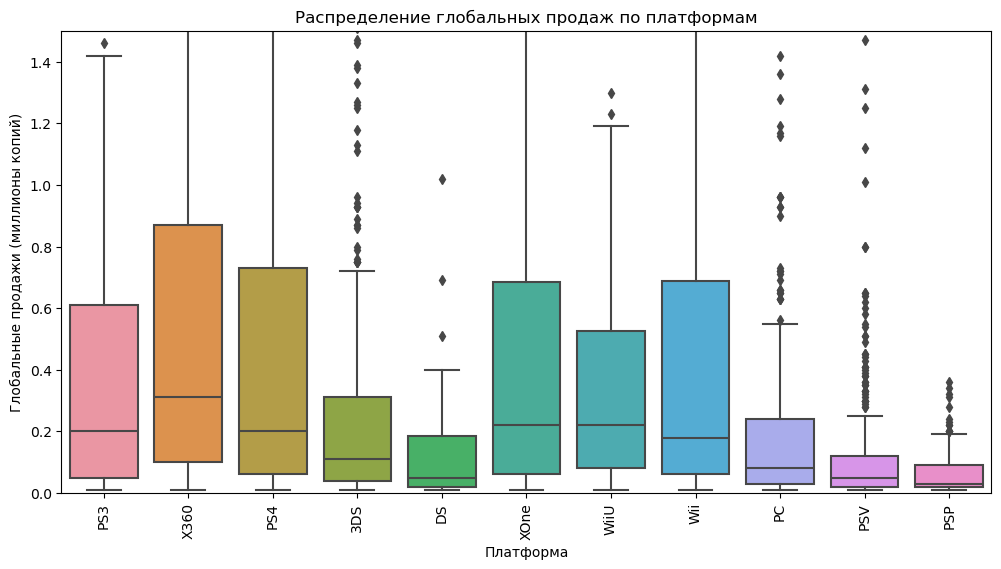

In [158]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=current_period_data)
plt.title('Распределение глобальных продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (миллионы копий)')
plt.xticks(rotation=90)
plt.ylim(0, 1.5)  # Установка ограничения на ось Y
plt.show()

#### Промежуточный вывод

I. Разброс данных: 

* У каждой платформы есть свой уникальный разброс значений глобальных продаж. Например, некоторые платформы имеют более высокие медианные продажи, чем другие, что указывает на различия в их популярности и успехе на рынке.

II. Выбросы: 

* На графике можно заметить наличие выбросов, которые представляют собой экстремально высокие или низкие значения продаж для определенных платформ. Эти выбросы могут указывать на особенно успешные или неудачные игры на конкретных платформах.

III. Сравнение платформ: 

* С помощью графика можно сравнивать продажи разных платформ наглядно. Например, можно видеть, какие платформы имеют более стабильные продажи, а какие менее предсказуемы из-за большего разброса значений.

IV. Тенденции и предпочтения: 

* Анализ "ящика с усами" также позволяет делать выводы о предпочтениях потребителей и тенденциях на рынке видеоигр. Например, платформы с более высокими медианными продажами могут указывать на более успешные игровые консоли или жанры игр.

### Влияние отзывов пользователей и критиков на продажи PS4, XOne, 3DS, PC, WiiU.

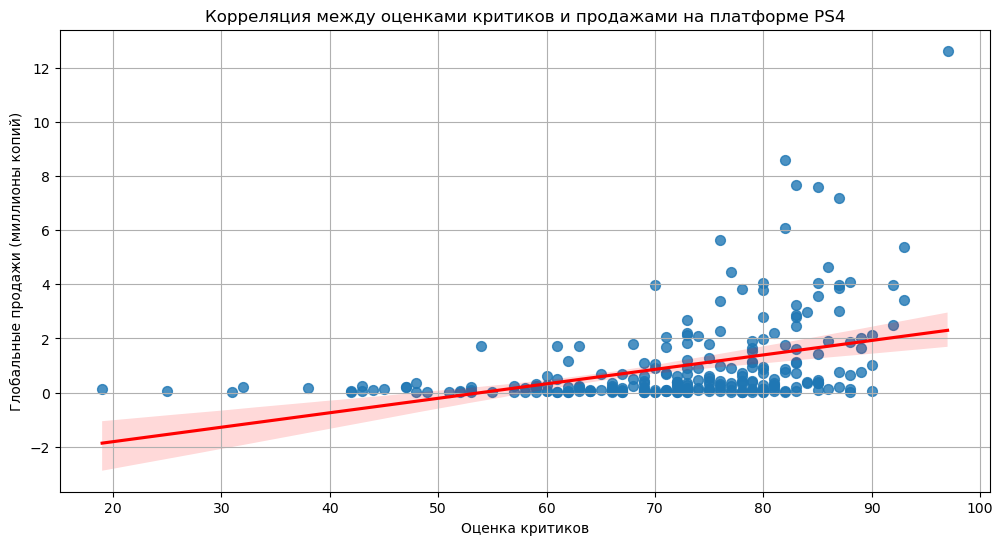

Корреляция по оценкам критиков на платформе PS4:
              critic_score  total_sales
critic_score      1.000000     0.406568
total_sales       0.406568     1.000000



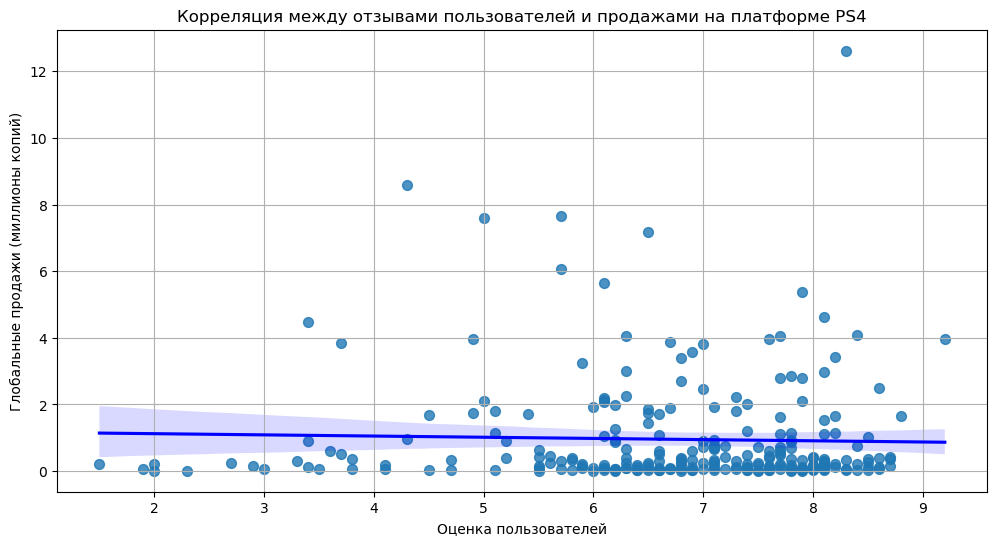

Корреляция по оценкам пользователей на платформе PS4:
             user_score  total_sales
user_score     1.000000    -0.031957
total_sales   -0.031957     1.000000



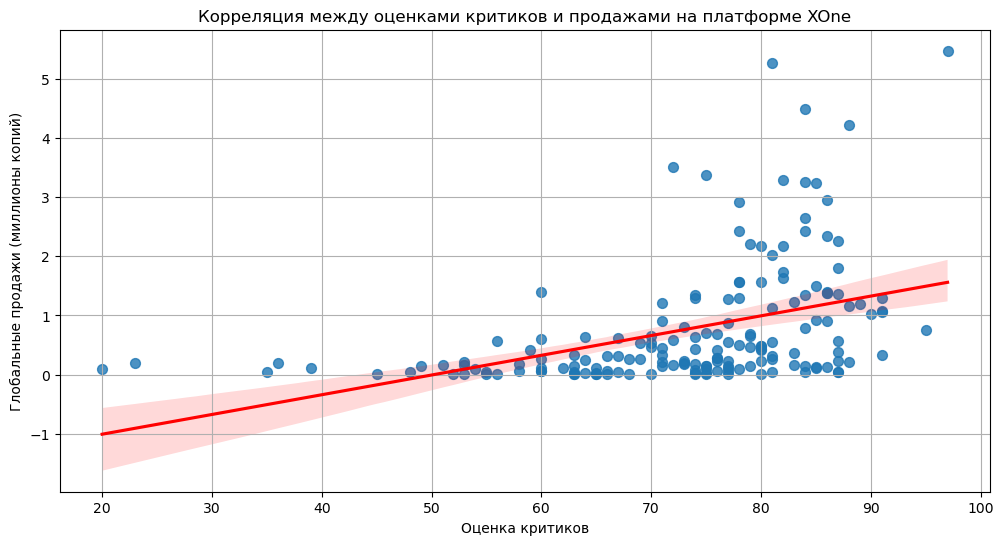

Корреляция по оценкам критиков на платформе XOne:
              critic_score  total_sales
critic_score      1.000000     0.416998
total_sales       0.416998     1.000000



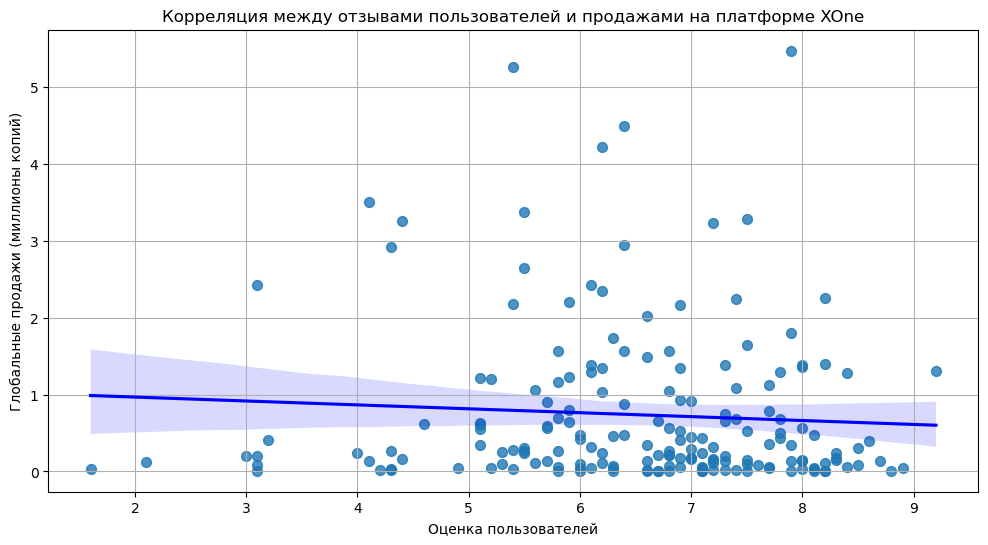

Корреляция по оценкам пользователей на платформе XOne:
             user_score  total_sales
user_score     1.000000    -0.068925
total_sales   -0.068925     1.000000



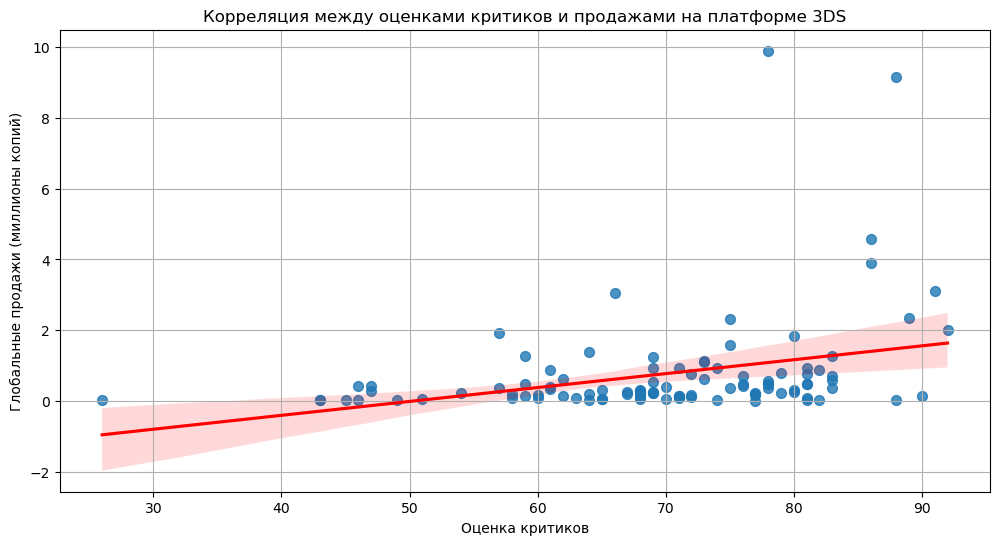

Корреляция по оценкам критиков на платформе 3DS:
              critic_score  total_sales
critic_score      1.000000     0.320803
total_sales       0.320803     1.000000



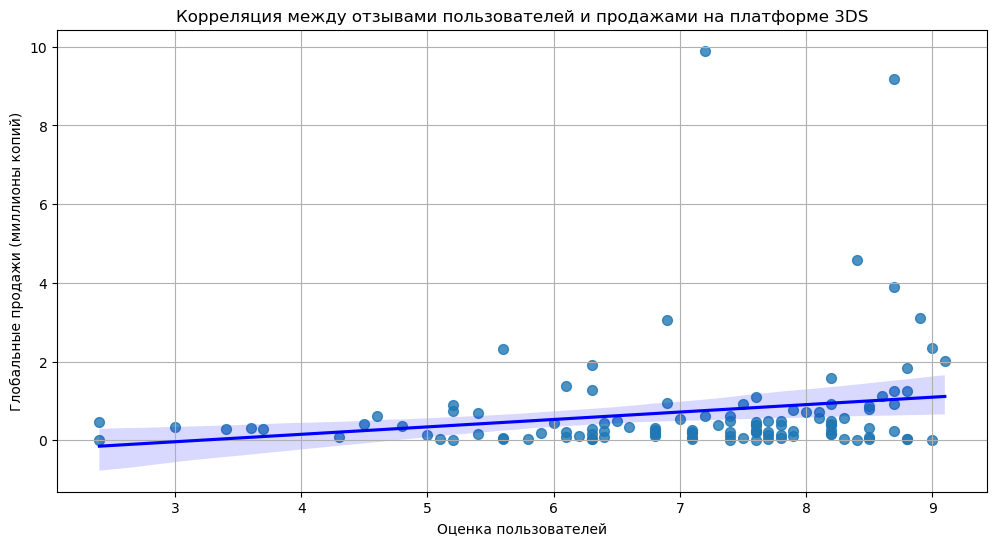

Корреляция по оценкам пользователей на платформе 3DS:
             user_score  total_sales
user_score     1.000000     0.197583
total_sales    0.197583     1.000000



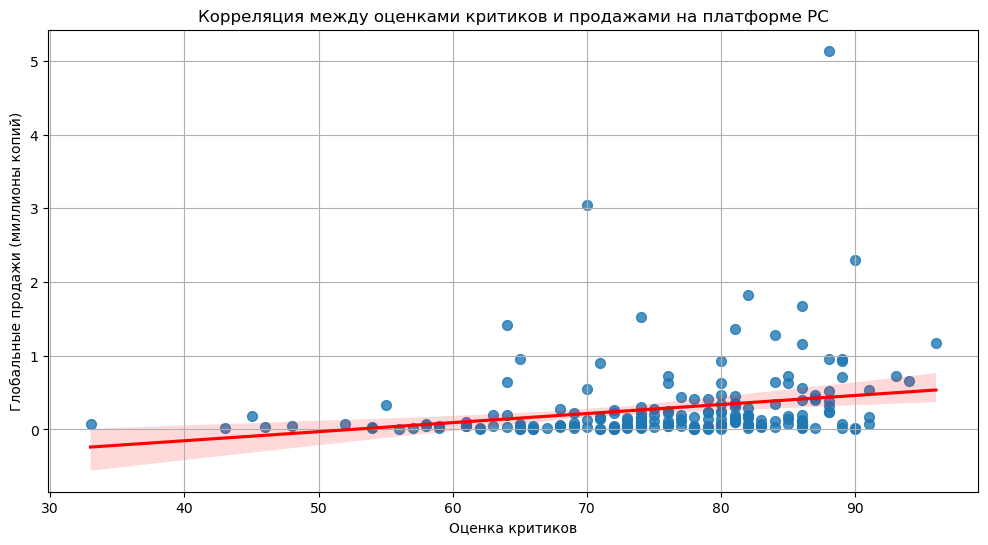

Корреляция по оценкам критиков на платформе PC:
              critic_score  total_sales
critic_score      1.000000     0.237243
total_sales       0.237243     1.000000



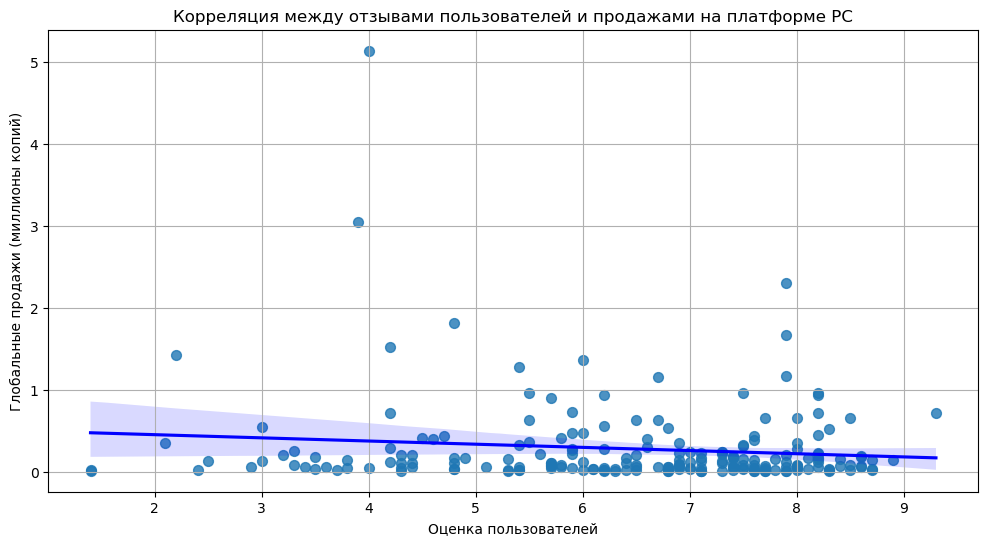

Корреляция по оценкам пользователей на платформе PC:
             user_score  total_sales
user_score     1.000000    -0.121867
total_sales   -0.121867     1.000000



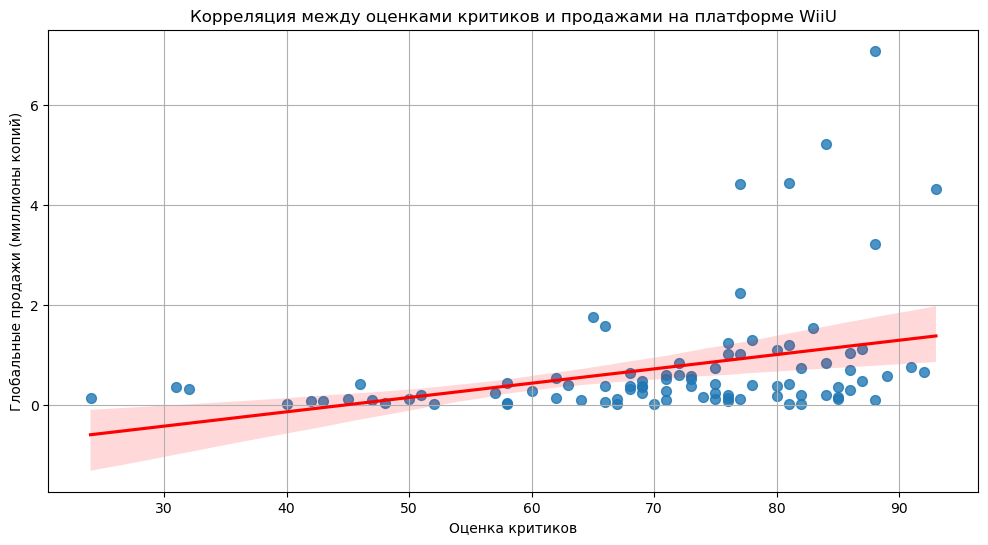

Корреляция по оценкам критиков на платформе WiiU:
              critic_score  total_sales
critic_score       1.00000      0.34838
total_sales        0.34838      1.00000



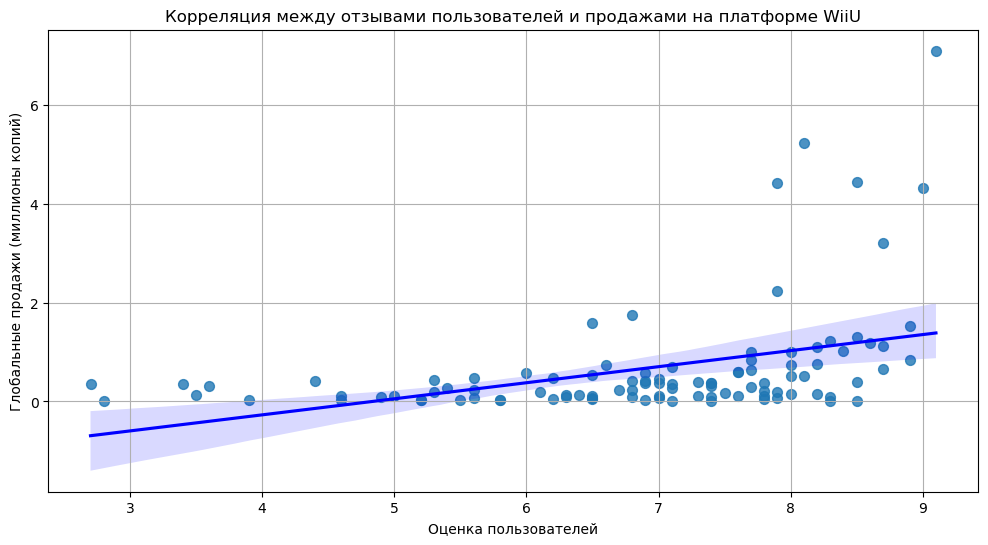

Корреляция по оценкам пользователей на платформе WiiU:
             user_score  total_sales
user_score     1.000000     0.400219
total_sales    0.400219     1.000000



In [195]:
popular_platforms = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']
platform_data = {}

# Проверим данные для каждой платформы
for popular_platform in popular_platforms:
    platform_data[popular_platform] = current_period_data[current_period_data['platform'] == popular_platform]

    # Проверим, есть ли данные
    if platform_data[popular_platform].empty:
        print(f"Данные для платформы {popular_platform} отсутствуют.")
    else:
        # Построим график рассеяния для оценок критиков и продаж
        plt.figure(figsize=(12, 6))
        sns.regplot(x='critic_score', y='total_sales', data=platform_data[popular_platform], scatter_kws={'s':50}, line_kws={"color":"red"})
        plt.title(f'Корреляция между оценками критиков и продажами на платформе {popular_platform}')
        plt.xlabel('Оценка критиков')
        plt.ylabel('Глобальные продажи (миллионы копий)')
        plt.grid(True)
        plt.show()

        # Вычислим и выведем корреляцию по оценкам критиков
        critic_corr = platform_data[popular_platform][['critic_score', 'total_sales']].corr()
        print(f'Корреляция по оценкам критиков на платформе {popular_platform}:')
        print(critic_corr)
        print()

        # Проверим данные для пользовательских оценок и продаж
        if 'user_score' in platform_data[popular_platform] and 'total_sales' in platform_data[popular_platform]:
            # Построим график рассеяния для оценок пользователей и продаж
            plt.figure(figsize=(12, 6))
            sns.regplot(x='user_score', y='total_sales', data=platform_data[popular_platform], scatter_kws={'s':50}, line_kws={"color":"blue"})
            plt.title(f'Корреляция между отзывами пользователей и продажами на платформе {popular_platform}')
            plt.xlabel('Оценка пользователей')
            plt.ylabel('Глобальные продажи (миллионы копий)')
            plt.grid(True)
            plt.show()

            # Вычислим и выведем корреляцию по оценкам пользователей
            user_corr = platform_data[popular_platform][['user_score', 'total_sales']].corr()
            print(f'Корреляция по оценкам пользователей на платформе {popular_platform}:')
            print(user_corr)
            print()
        else:
            print(f"Данные для отзывов пользователей и/или продаж на платформе {popular_platform} отсутствуют.")


#### Промежуточный вывод

I. PS4:

Корреляция по оценкам критиков:

* Значение корреляции между оценками критиков и продажами составляет 0.407. Это указывает на умеренную положительную корреляцию. Игры с более высокими оценками критиков склонны иметь более высокие продажи.

Корреляция по оценкам пользователей:

* Корреляция составляет -0.032, что говорит о том, что оценки пользователей практически не коррелируют с объемами продаж. Это может указывать на то, что пользовательские оценки не имеют значительного влияния на продажи игр на PS4.

II. Xbox One (XOne):

Корреляция по оценкам критиков:

* Значение корреляции составляет 0.417. Это также указывает на умеренную положительную корреляцию, что аналогично результатам для PS4.

Корреляция по оценкам пользователей:

* Корреляция составляет -0.069. Это значение близко к нулю, что означает, что пользовательские оценки также не имеют значительного влияния на продажи игр на Xbox One.

III. Nintendo 3DS (3DS):

Корреляция по оценкам критиков:

* Значение корреляции составляет 0.321, что указывает на слабую положительную корреляцию.

Корреляция по оценкам пользователей:

* Корреляция составляет 0.198, что также указывает на слабую положительную корреляцию.

IV. PC и Wii U:

PC:

Корреляция по оценкам критиков:
* Значение корреляции составляет 0.237, что указывает на слабую положительную корреляцию.

Корреляция по оценкам пользователей:

* Корреляция составляет -0.122, что говорит о слабой отрицательной корреляции, указывая на минимальное влияние пользовательских оценок на продажи игр.

Wii U:

Корреляция по оценкам критиков:

* Значение корреляции составляет 0.348, что указывает на умеренную положительную корреляцию.

Корреляция по оценкам пользователей:

* Корреляция составляет 0.400, что указывает на умеренную положительную корреляцию.

Оценки критиков:

* На всех платформах (PS4, Xbox One, 3DS, PC и Wii U) наблюдается положительная корреляция между оценками критиков и продажами. Это указывает на то, что более высокие оценки критиков в целом способствуют более высоким продажам игр.

Оценки пользователей:

* Корреляция между оценками пользователей и продажами значительно варьируется в зависимости от платформы. На PS4 и Xbox One эта корреляция отрицательная и практически отсутствует. На PC она также отрицательная, но слабая. На 3DS и Wii U наблюдается слабая и умеренная положительная корреляция соответственно, что может указывать на то, что на этих платформах пользовательские оценки имеют некоторое влияние на продажи.

### Распределение игр по жанрам

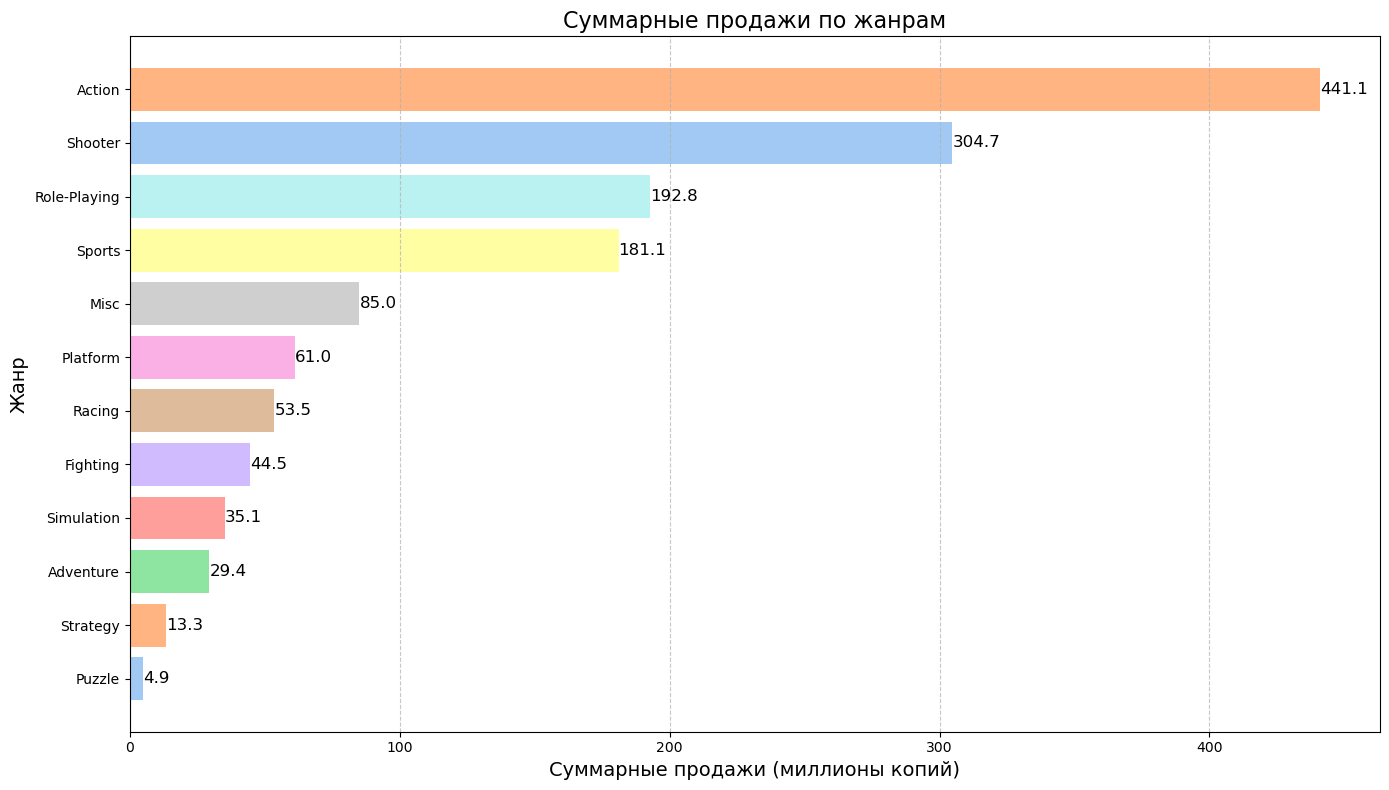

In [193]:
# Сортируем по суммарным продажам от большего к меньшему
genre_sales = current_period_data.groupby('genre')['total_sales'].sum().sort_values(ascending=True)

# Создаем горизонтальную столбцовую диаграмму
plt.figure(figsize=(14, 8))
colors = sns.color_palette("pastel", len(genre_sales))  # Используем мягкую цветовую палитру

bars = plt.barh(genre_sales.index, genre_sales.values, color=colors)
plt.title('Суммарные продажи по жанрам', fontsize=16)
plt.xlabel('Суммарные продажи (миллионы копий)', fontsize=14)
plt.ylabel('Жанр', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем метки данных
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.1f}', va='center', ha='left', fontsize=12, color='black')

plt.tight_layout()
plt.show()


Строчный вариант:

In [161]:
genre_sales

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.06
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

Вычисляем медианные продажи по жанрам

In [162]:
genre_median_sales = current_period_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)

Визуализация:

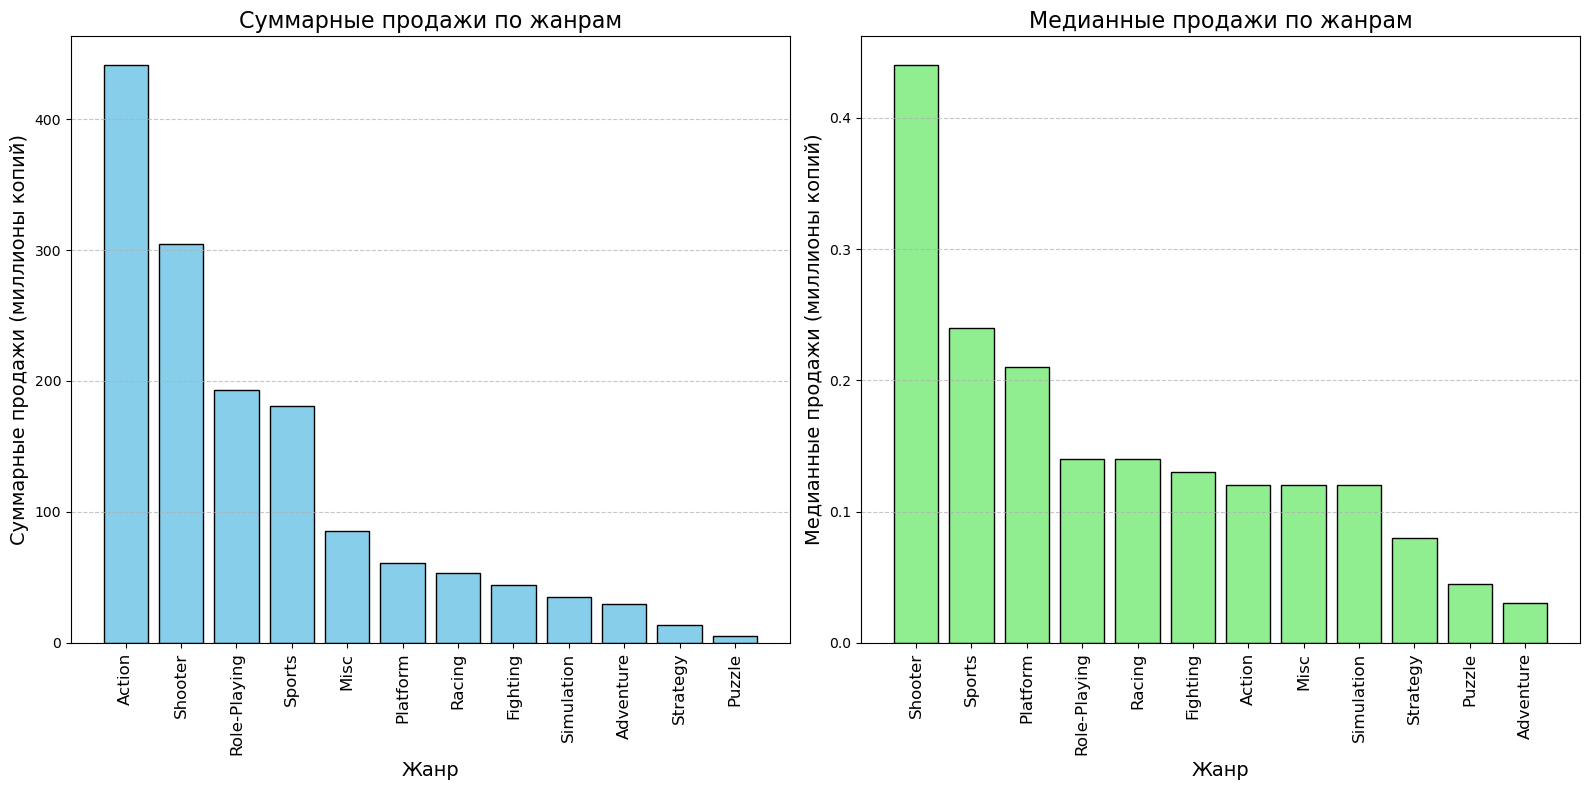

In [189]:
plt.figure(figsize=(16, 8))

# График суммарных продаж по жанрам
plt.subplot(1, 2, 1)
plt.bar(genre_sales.index, genre_sales.values, color='skyblue', edgecolor='black')
plt.title('Суммарные продажи по жанрам', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Суммарные продажи (миллионы копий)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# График медианных продаж по жанрам
plt.subplot(1, 2, 2)
plt.bar(genre_median_sales.index, genre_median_sales.values, color='lightgreen', edgecolor='black')
plt.title('Медианные продажи по жанрам', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Медианные продажи (миллионы копий)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


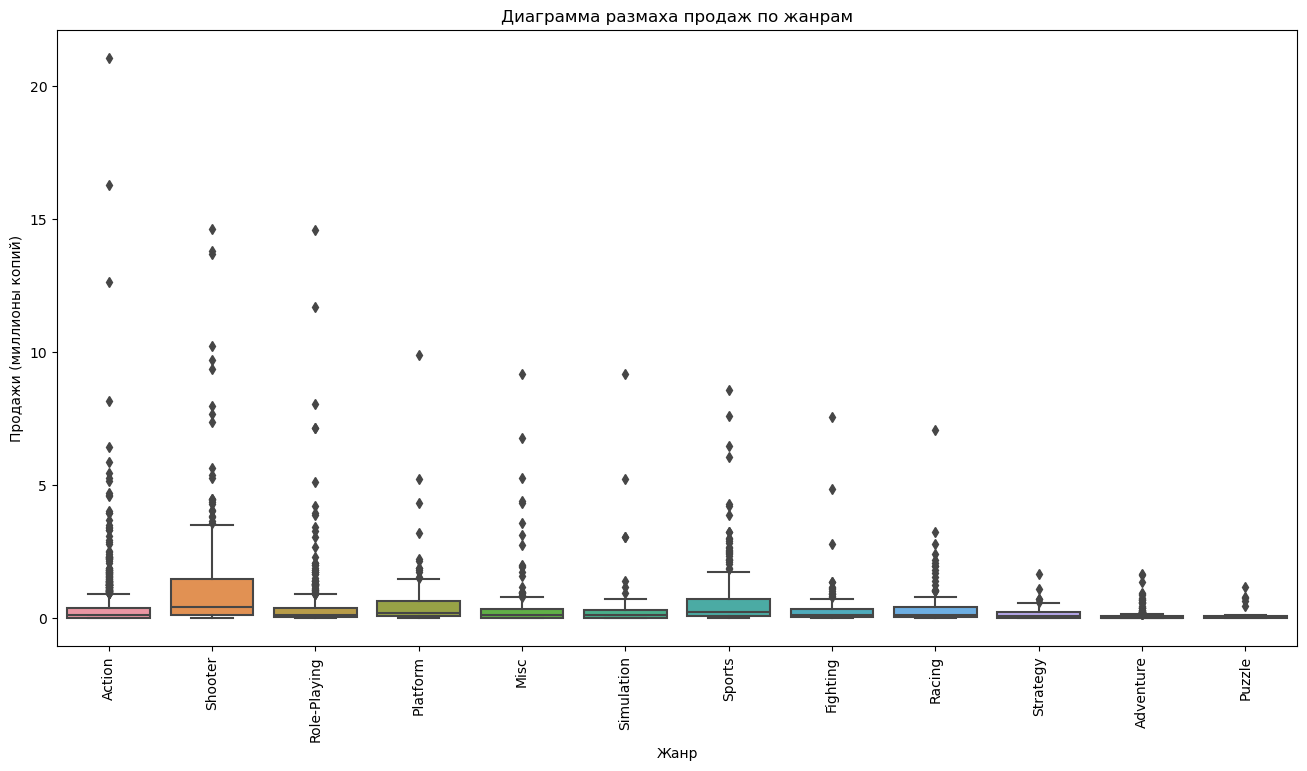

In [164]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=current_period_data, x='genre', y='total_sales')
plt.title('Диаграмма размаха продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (миллионы копий)')
plt.xticks(rotation=90)
plt.show()

In [165]:
genre_median_sales

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

#### Промежуточный вывод:

I. Данные по годам выпуска игр:

* Наибольшее количество игр выпускалось в период с 2005 по 2015 годы.
* Данные за все периоды важны для анализа трендов, но для прогнозов актуальны последние 10 лет.


II. Продажи по платформам:

* Платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS.
* Платформы появляются и исчезают примерно за 10-15 лет.


III. Актуальный период:

* Актуальный период для анализа и прогнозирования — последние 10 лет (2013-2016).


IV. Лидеры по продажам:

* Лидирующие платформы в актуальном периоде: PS4, XOne, 3DS, PS3, WiiU.
* Эти платформы потенциально прибыльные для будущих релизов.


V. График "ящик с усами":

* Глобальные продажи сильно варьируются между платформами. PS4 и XOne показывают хорошие результаты.


VI. Отзывы и продажи:

* На платформе PS4 наблюдается положительная корреляция между оценками критиков и продажами, а также между оценками пользователей и продажами.


VII. Распределение по жанрам:

Наиболее прибыльные жанры: 

* Shooter 440 млн. копий
* Sports  240 млн. копий
* Platform 210 млн. копий
* Эти жанры занимают лидирующие позиции по суммарным продажам и прибыли. Shooter явно выделяется как наиболее прибыльный жанр.

Жанры с высокими суммарными продажами:

* Shooter 440 млн. копий
* Role-Playing 140 млн. копий
* Action 120 млн. копий

* Из этого списка можно заметить, что жанры Shooter, Role-Playing и Action выделяются. Однако, следует учесть, тот факт, что Role-Playing занимает 4 место, а Action - 7. Для большей точности, можно добавить Sports и Platform к жанрам с высокими суммарными продажами, так как они находятся в топе по прибыльности.

## Состаляем портрет пользователя каждого региона

### Суммарные продажи по регионам

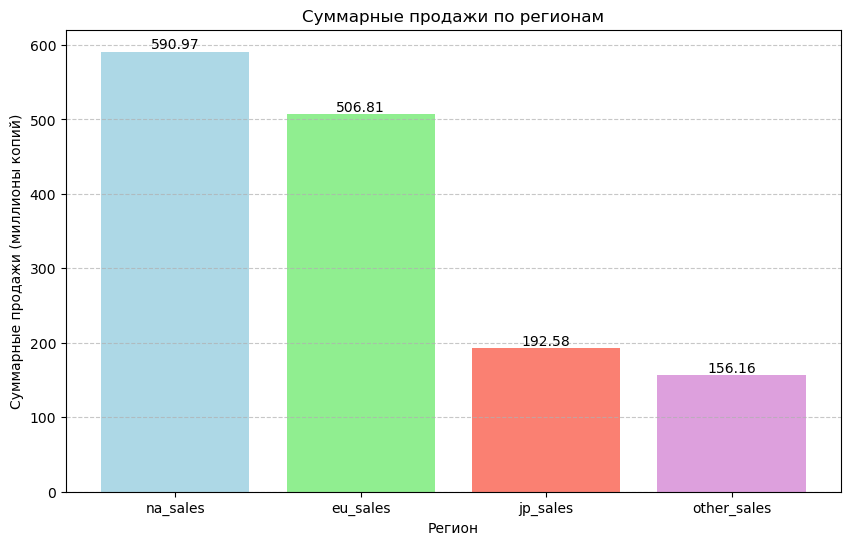

In [184]:
region_sales = current_period_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

plt.figure(figsize=(10, 6))

colors = ['lightblue', 'lightgreen', 'salmon', 'plum']

bars = plt.bar(region_sales.index, region_sales.values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.title('Суммарные продажи по регионам')
plt.xlabel('Регион')
plt.ylabel('Суммарные продажи (миллионы копий)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Топ-5 платформ по регионам

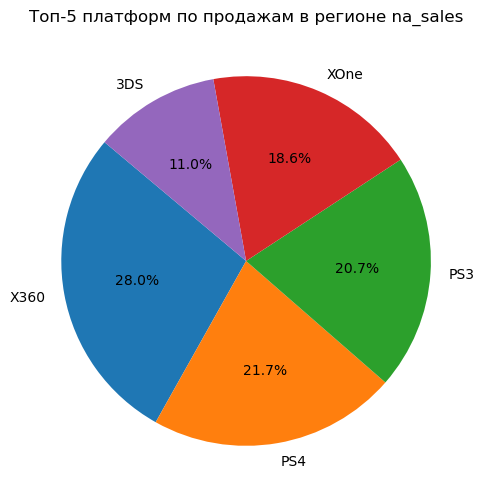


Топ-5 платформ по продажам в регионе na_sales:
X360: 140.05 миллионов копий
PS4: 108.74 миллионов копий
PS3: 103.38 миллионов копий
XOne: 93.12 миллионов копий
3DS: 55.31 миллионов копий


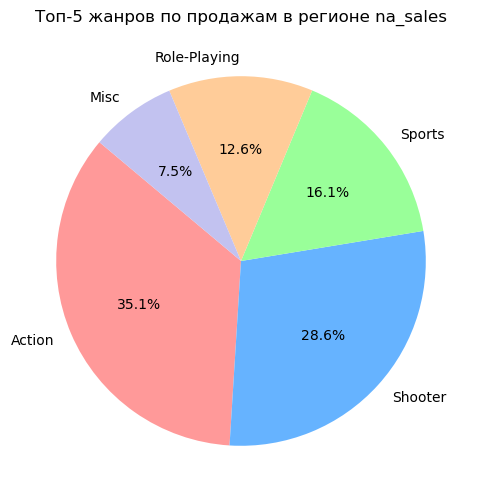


Топ-5 жанров по продажам в регионе na_sales:
Action: 177.84 миллионов копий
Shooter: 144.77 миллионов копий
Sports: 81.53 миллионов копий
Role-Playing: 64.00 миллионов копий
Misc: 38.19 миллионов копий


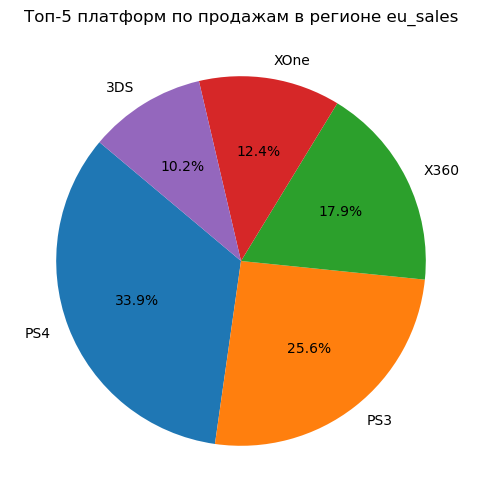


Топ-5 платформ по продажам в регионе eu_sales:
PS4: 141.09 миллионов копий
PS3: 106.85 миллионов копий
X360: 74.52 миллионов копий
XOne: 51.59 миллионов копий
3DS: 42.64 миллионов копий


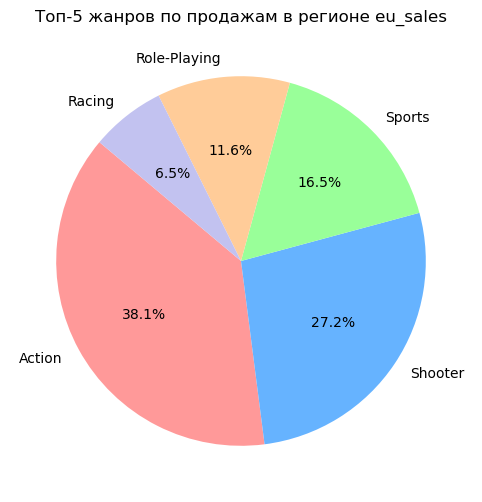


Топ-5 жанров по продажам в регионе eu_sales:
Action: 159.34 миллионов копий
Shooter: 113.47 миллионов копий
Sports: 69.08 миллионов копий
Role-Playing: 48.53 миллионов копий
Racing: 27.29 миллионов копий


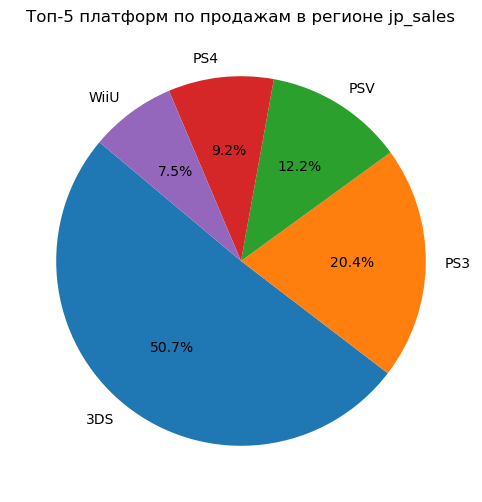


Топ-5 платформ по продажам в регионе jp_sales:
3DS: 87.79 миллионов копий
PS3: 35.29 миллионов копий
PSV: 21.04 миллионов копий
PS4: 15.96 миллионов копий
WiiU: 13.01 миллионов копий


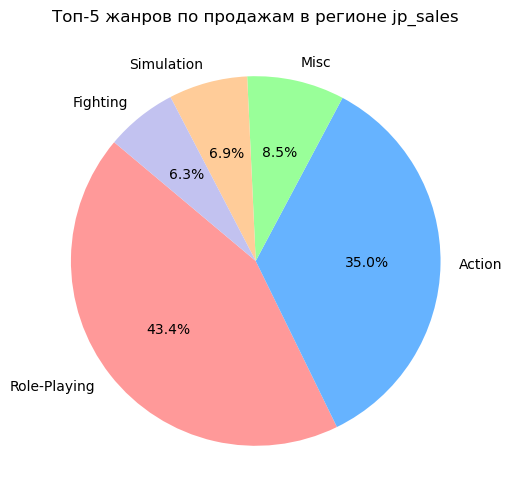


Топ-5 жанров по продажам в регионе jp_sales:
Role-Playing: 65.44 миллионов копий
Action: 52.80 миллионов копий
Misc: 12.86 миллионов копий
Simulation: 10.41 миллионов копий
Fighting: 9.44 миллионов копий


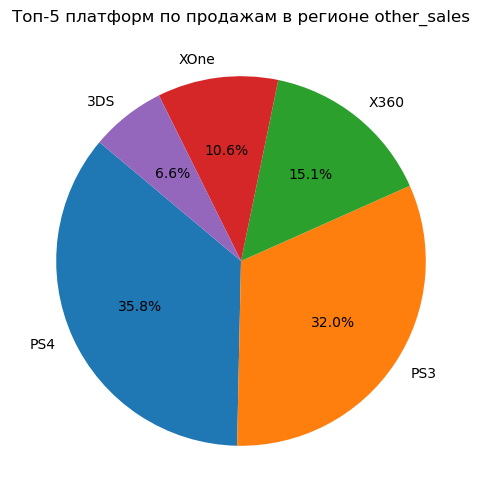


Топ-5 платформ по продажам в регионе other_sales:
PS4: 48.35 миллионов копий
PS3: 43.26 миллионов копий
X360: 20.40 миллионов копий
XOne: 14.27 миллионов копий
3DS: 8.87 миллионов копий


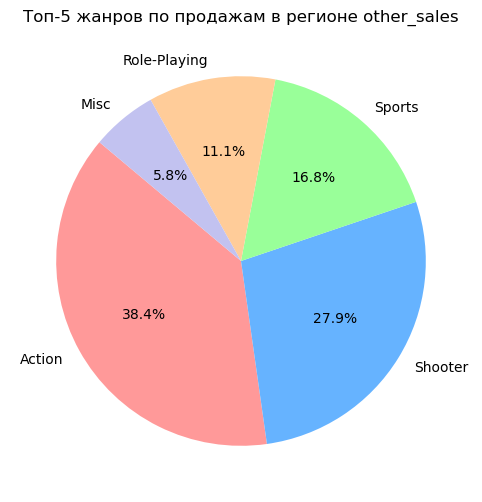


Топ-5 жанров по продажам в регионе other_sales:
Action: 51.14 миллионов копий
Shooter: 37.26 миллионов копий
Sports: 22.44 миллионов копий
Role-Playing: 14.83 миллионов копий
Misc: 7.67 миллионов копий


In [186]:
def top_platforms_by_region(region):
    top_platforms = current_period_data.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    plt.figure(figsize=(10, 6))
    plt.pie(top_platforms.values, labels=top_platforms.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Топ-5 платформ по продажам в регионе {region}')
    plt.show()
    print(f"\nТоп-5 платформ по продажам в регионе {region}:")
    for platform, sales in top_platforms.items():
        print(f"{platform}: {sales:.2f} миллионов копий")

def top_genres_by_region(region):
    top_genres = current_period_data.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    plt.figure(figsize=(10, 6))
    plt.pie(top_genres.values, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
    plt.title(f'Топ-5 жанров по продажам в регионе {region}')
    plt.show()
    print(f"\nТоп-5 жанров по продажам в регионе {region}:")
    for genre, sales in top_genres.items():
        print(f"{genre}: {sales:.2f} миллионов копий")

for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    top_platforms_by_region(region)
    top_genres_by_region(region)

#### Промежуточный вывод

Платформы:

* В Северной Америке и Европе лидирующей платформой является PS4, хотя в Северной Америке X360 также занимает высокую позицию.
* В Японии лидирует 3DS, что существенно отличается от тенденций в других регионах.
* В остальных странах также преобладает PS4.

Жанры:

* Жанр "Shooter" является наиболее популярным в Северной Америке, Европе и других странах.
* В Японии доминируют жанры "Role-Playing" и "Action".
* В Северной Америке и Европе жанр "Action" занимает лидирующие позиции, что указывает на общую популярность этого жанра в западных странах.

Региональные различия:

* Интересы по платформам и жанрам существенно различаются между регионами, что указывает на культурные и рыночные различия.
* Эти различия необходимо учитывать при разработке и маркетинге видеоигр для различных регионов.

### Влияние рейтинга ESRB на продажи в отдельных регионах

In [168]:
esrb_sales = current_period_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

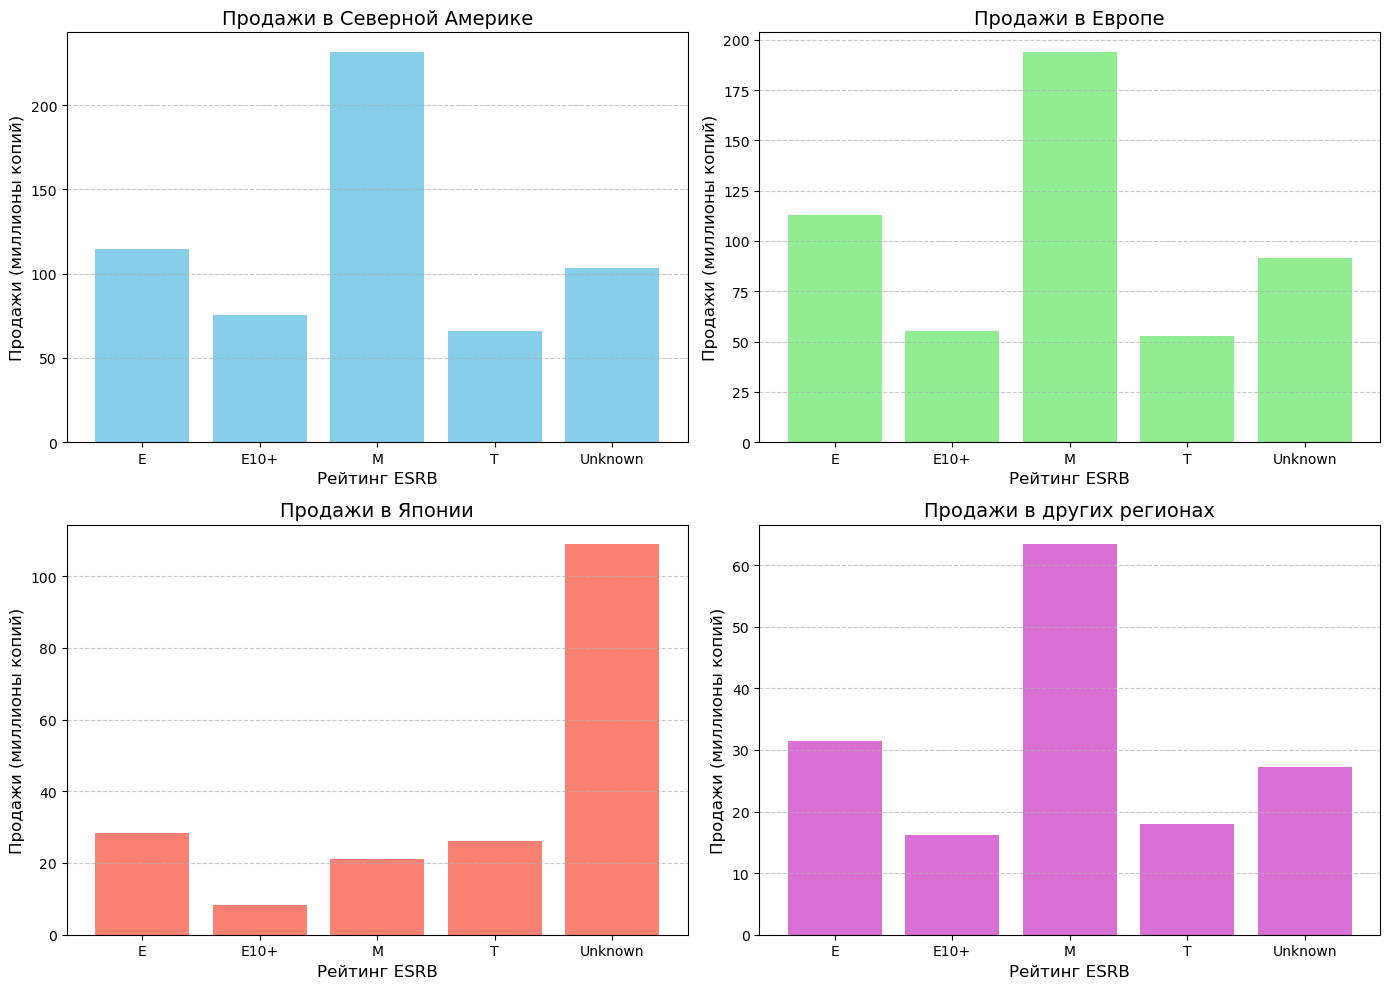

In [179]:
# Настройка фигуры и осей
plt.figure(figsize=(14, 10))

# График для Северной Америки
plt.subplot(2, 2, 1)
plt.bar(esrb_sales.index, esrb_sales['na_sales'], color='skyblue')
plt.title('Продажи в Северной Америке', fontsize=14)
plt.xlabel('Рейтинг ESRB', fontsize=12)
plt.ylabel('Продажи (миллионы копий)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# График для Европы
plt.subplot(2, 2, 2)
plt.bar(esrb_sales.index, esrb_sales['eu_sales'], color='lightgreen')
plt.title('Продажи в Европе', fontsize=14)
plt.xlabel('Рейтинг ESRB', fontsize=12)
plt.ylabel('Продажи (миллионы копий)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# График для Японии
plt.subplot(2, 2, 3)
plt.bar(esrb_sales.index, esrb_sales['jp_sales'], color='salmon')
plt.title('Продажи в Японии', fontsize=14)
plt.xlabel('Рейтинг ESRB', fontsize=12)
plt.ylabel('Продажи (миллионы копий)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# График для других регионов
plt.subplot(2, 2, 4)
plt.bar(esrb_sales.index, esrb_sales['other_sales'], color='orchid')
plt.title('Продажи в других регионах', fontsize=14)
plt.xlabel('Рейтинг ESRB', fontsize=12)
plt.ylabel('Продажи (миллионы копий)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Автоматическое размещение подграфиков
plt.tight_layout()
plt.show()

In [181]:
esrb_sales

,na_sales,eu_sales,jp_sales,other_sales,total_sales,average_sales
rating,,,,,,
E,114.37,113.02,28.33,31.44,287.16,71.7900
E10+,75.70,55.37,8.19,16.23,155.49,38.8725
M,231.57,193.96,21.20,63.38,510.11,127.5275
T,66.02,52.96,26.02,17.94,162.94,40.7350
Unknown,103.31,91.50,108.84,27.17,330.82,82.7050


#### Промежуточный вывод:

Рейтинговые Системы:

* Северная Америка (NA): Использует систему рейтингов ESRB.
* Европа (EU): В основном использует систему PEGI.
* Япония (JP): Применяет систему CERO.
* Другие регионы: Могут использовать различные местные системы рейтингов, например, ACB в Австралии.

Анализ по регионам:

* Для более точного анализа необходимо учитывать, что рейтинги ESRB, PEGI, CERO и другие не всегда сопоставимы напрямую. Например, игра с рейтингом "E" в ESRB может иметь другой рейтинг в PEGI или CERO.

I. Северная Америка (NA): 

* Продажи игр с рейтингом "E" и "M" действительно могут быть высокими, учитывая специфику рейтинговой системы ESRB.

II. Европа (EU): 

* Похожая ситуация с NA, но с учетом системы PEGI, игры с рейтингом "3" (аналог "E") и "18" (аналог "M") могут доминировать.

III. Япония (JP): 

* Высокие продажи игр с рейтингами "A" (аналог "E") и "B" (аналог "T") по системе CERO могут указывать на предпочтения более молодой аудитории.

IV. Другие регионы: 
* Продажи игр с рейтингами, аналогичными "E" и "M", могут быть высокими, но это следует проверять с учетом местных рейтинговых систем или без привязки к рейтингам.

*** Для более точного анализа стоит учитывать региональные особенности рейтинговых систем и при необходимости использовать дополнительные данные для сопоставления. Это позволит более точно интерпретировать данные о продажах и предпочтениях аудитории в разных регионах.

## Проверка гипотез

### Провека гипотез (Фильтруем данные для Xbox One и PC)

### Формулировка гипотезы:

* Нулевая гипотеза (Н0): Средние пользовательские рейтинги для платформ Xbox One и PC одинаковы.
* Альтернативная гипотеза (Н1): Средние пользовательские рейтинги для платформ Xbox One и PC различаются.

Результаты теста для средних пользовательских рейтингов платформ Xbox One и PC:
Средний рейтинг Xbox One: 6.521428571428572
Средний рейтинг PC: 6.4286407766990274
p-value: 0.5489537965134912
Нет оснований отвергать нулевую гипотезу: недостаточно доказательств для утверждения, что средние пользовательские рейтинги для платформ Xbox One и PC различаются.


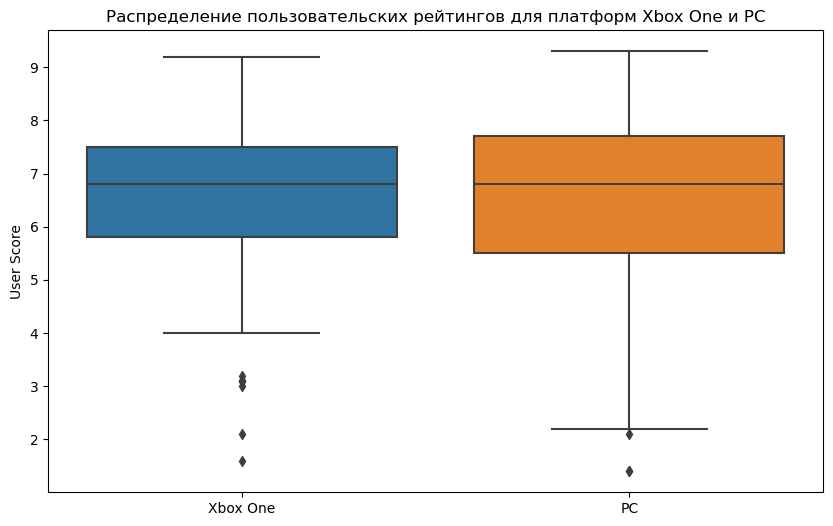

In [176]:
xbox_one_user_scores = current_period_data[current_period_data['platform'] == 'XOne']['user_score'].dropna()
pc_user_scores = current_period_data[current_period_data['platform'] == 'PC']['user_score'].dropna()

mean_xbox_one = xbox_one_user_scores.mean()
mean_pc = pc_user_scores.mean()

alpha = 0.05

result_platforms = stats.ttest_ind(xbox_one_user_scores, pc_user_scores, equal_var=False)

print("Результаты теста для средних пользовательских рейтингов платформ Xbox One и PC:")
print("Средний рейтинг Xbox One:", mean_xbox_one)
print("Средний рейтинг PC:", mean_pc)
print("p-value:", result_platforms.pvalue)

if result_platforms.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: есть основания считать, что средние пользовательские рейтинги для платформ Xbox One и PC различаются.")
else:
    print("Нет оснований отвергать нулевую гипотезу: недостаточно доказательств для утверждения, что средние пользовательские рейтинги для платформ Xbox One и PC различаются.")

data_to_plot = [xbox_one_user_scores, pc_user_scores]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)
plt.xticks([0, 1], ['Xbox One', 'PC'])
plt.ylabel('User Score')
plt.title('Распределение пользовательских рейтингов для платформ Xbox One и PC')
plt.show()


#### Промежуточный вывод:

Результаты t-теста для сравнения средних пользовательских рейтингов платформ Xbox One и PC показали, что:

* Средний пользовательский рейтинг для Xbox One составляет 6.52.
* Средний пользовательский рейтинг для PC составляет 6.43.
* p-value, полученное в результате теста, равно 0.5489, что значительно превышает уровень значимости (alpha) 0.05.
* Следовательно, мы не можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги для платформ Xbox One и PC одинаковы. На данный момент нет достаточных доказательств для утверждения, что средние пользовательские рейтинги для этих двух платформ различаются.

### Провека гипотез (Фильтруем данные для жанров Action и Sports)

#### Формулировка гипотезы:

* Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports не различаются.
* Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

Проведем тест с помощью t-критерия Стьюдента для независимых выборок:

Результаты теста для средних пользовательских рейтингов жанров Action и Sports:
Средний рейтинг Action: 6.825047801147227
Средний рейтинг Sports: 5.455670103092784
p-value: 5.989458066467418e-20
Отвергаем нулевую гипотезу: есть основания считать, что средние пользовательские рейтинги жанров Action и Sports различаются.


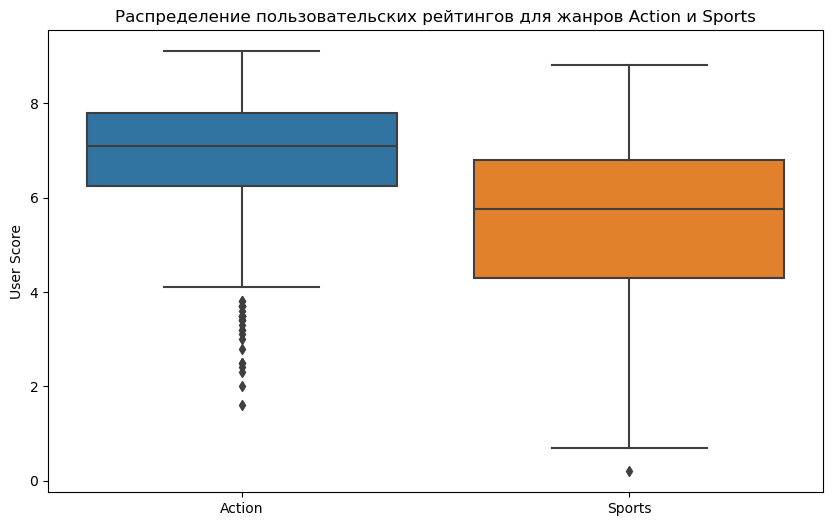

In [178]:
action_user_scores = current_period_data[current_period_data['genre'] == 'Action']['user_score'].dropna()
sports_user_scores = current_period_data[current_period_data['genre'] == 'Sports']['user_score'].dropna()

mean_action = action_user_scores.mean()
mean_sports = sports_user_scores.mean()

alpha = 0.05

result_genres = stats.ttest_ind(action_user_scores, sports_user_scores, equal_var=False)

print("Результаты теста для средних пользовательских рейтингов жанров Action и Sports:")
print("Средний рейтинг Action:", mean_action)
print("Средний рейтинг Sports:", mean_sports)
print("p-value:", result_genres.pvalue)

if result_genres.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: есть основания считать, что средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Нет оснований отвергать нулевую гипотезу: недостаточно доказательств для утверждения, что средние пользовательские рейтинги жанров Action и Sports различаются.")

plt.figure(figsize=(10, 6))
sns.boxplot(data=[action_user_scores, sports_user_scores])
plt.xticks([0, 1], ['Action', 'Sports'])
plt.ylabel('User Score')
plt.title('Распределение пользовательских рейтингов для жанров Action и Sports')
plt.show()

#### Промежуточный вывод:

Средние пользовательские рейтинги:

* Средний рейтинг для жанра Action составляет 6.83.
* Средний рейтинг для жанра Sports составляет 5.46.

Результаты t-теста:

* p-value: 5.989458066467418e-20, что значительно меньше принятого уровня значимости (обычно 0.05).

Вывод:

* Отвергаем нулевую гипотезу: есть основания считать, что средние пользовательские рейтинги жанров Action и Sports действительно различаются.
* Это означает, что пользователи оценивают игры жанра Action существенно выше, чем игры жанра Sports.

##### <b>Пояснение:</b>

I. Импортируем scipy.stats для использования t-теста и фильтруем данные для каждой из проверок гипотез (платформы и жанры).

II. Проверка гипотезы для платформ Xbox One и PC:

* Мы извлекаем пользовательские рейтинги для каждой платформы.
* Применяем двухвыборочный t-тест с помощью stats.ttest_ind.
* Выводим p-value и делаем вывод на основе заданного уровня значимости alpha.

III. Проверка гипотезы для жанров Action и Sports:

* Аналогично, извлекаем пользовательские рейтинги для каждого жанра.
* Снова применяем двухвыборочный t-тест и выводим результаты.

I. Формулирование гипотез:

* Нулевая гипотеза (H0): 
Всегда предполагает отсутствие эффекта или различий. В данном случае, нулевая гипотеза предполагает, что средние пользовательские рейтинги для выбранных платформ или жанров одинаковы.
* Альтернативная гипотеза (H1): 
Предполагает наличие эффекта или различий. В данном случае, альтернативная гипотеза предполагает, что средние пользовательские рейтинги для выбранных платформ или жанров различаются.

II. Выбор t-критерия:

* t-критерий Стьюдента для независимых выборок применяется, когда мы сравниваем средние значения двух независимых групп, при этом предполагаем, что данные в каждой группе распределены нормально. Этот тест позволяет определить, есть ли статистически значимое различие между средними значениями двух групп. В данном случае мы сравниваем пользовательские рейтинги для двух платформ и двух жанров.

### Общий вывод проекта "Стримчик":

1. Импорт и первичная обработка данных:

* Импортированы необходимые библиотеки и загружены данные о 16,715 играх. Проведен первичный анализ.
* Проверены и удалены неявные дубликаты.
* Обработаны пропуски: заменены на 'Unknown' или NaN в зависимости от колонки. Удалены строки с пропусками в колонках name и genre.
* Приведены названия колонок к нижнему регистру и преобразованы типы данных. Добавлена колонка с суммарными продажами по регионам.

2. Анализ распределения данных:

* Наблюдаются значительные различия в продажах между платформами. Некоторые платформы имеют более высокие медианные продажи, указывая на их успех на рынке.
* Выбросы на графиках могут указывать на особенно успешные или неудачные игры.

3. Сравнение платформ:

* Оценки критиков имеют умеренную положительную корреляцию с продажами на всех платформах, что свидетельствует о влиянии критических отзывов на продажи.
* Оценки пользователей имеют различную корреляцию с продажами в зависимости от платформы. На PS4 и Xbox One эта корреляция отрицательная и почти отсутствует. На 3DS и Wii U наблюдается умеренная положительная корреляция.

4. Анализ данных по годам и платформам:

* Наибольшее количество игр выпускалось между 2005 и 2015 годами. Актуальный период для анализа и прогнозов — последние 10 лет (2013-2016).
* Лидеры по суммарным продажам за актуальный период: PS4, Xbox One, 3DS, PS3, WiiU.

5. Жанры и платформы:

* Наиболее прибыльные жанры: Sport, Shooter, Platform.
* В Северной Америке и Европе доминирует PS4, в Японии — 3DS.
* Жанр "Shooter" наиболее популярен в Северной Америке и Европе, в Японии — Role-Playing и Action.

6. Региональные различия:

* Для более точного анализа необходимо учитывать, что рейтинги ESRB, PEGI, CERO и другие не всегда сопоставимы напрямую. Например, игра с рейтингом "E" в ESRB может иметь другой рейтинг в PEGI или CERO.

* В Северной Америке и Европе преобладают игры с рейтингами "E" и "M" для Европы это PEGI аналог рейтинг "3" и "18", в Японии — "E" и "T" по ситеме CERO это рейтинг "А" и "B", нужно учитывать рейтинговую систему стран. Так как они могут быть не сопостовимы.

* Продажи игр с рейтингами, аналогичными "E" и "M", могут быть высокими, но это следует проверять с учетом местных рейтинговых систем или без привязки к рейтингам.


7. Результаты t-теста:

* Средние пользовательские рейтинги платформ Xbox One и PC не имеют значимых различий (p-value = 0.5489).
* Средние пользовательские рейтинги жанров Action и Sports значительно различаются (p-value < 0.05), что указывает на * предпочтение игр жанра Action.